In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [3]:
train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
#Filling the Null values in 'Item_Weight' column with the average weight 
train_data['Item_Weight'].fillna(value=train_data['Item_Weight'].mean(),inplace=True)
test_data['Item_Weight'].fillna(value=test_data['Item_Weight'].mean(),inplace=True)

#Filling the Null values in 'Outlet_Size' column with "Unknown"
train_data['Outlet_Size'].fillna(value='Unknown',inplace=True)
test_data['Outlet_Size'].fillna(value='Unknown',inplace=True)

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


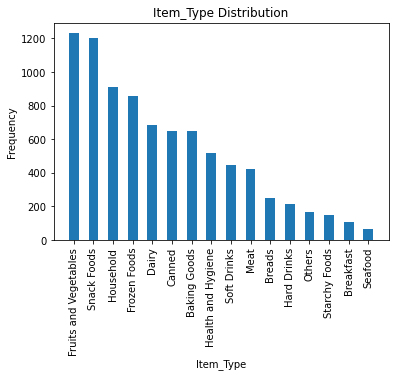

In [7]:
train_data['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Item_Type'].value_counts().index, train_data['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Item_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',train_data['Item_Type'].value_counts())

In [8]:
# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [9]:
train_data['Item_Type']=train_data[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
test_data['Item_Type']=test_data[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


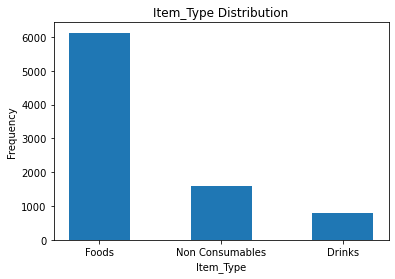

In [10]:
train_data['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Item_Type'].value_counts().index, train_data['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Item_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',train_data['Item_Type'].value_counts())

Item_Fat_Content:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


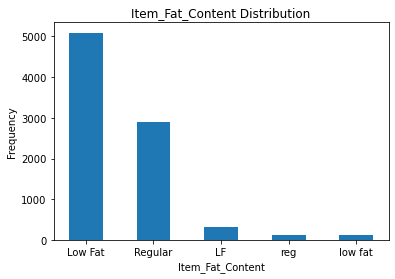

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Item_Fat_Content'].value_counts().index, train_data['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',train_data['Item_Fat_Content'].value_counts())
#df1['Item_Fat_Content'].value_counts()

In [12]:
# From the above graph we can see that there are actually two classes in 'Item_Fat_Content'. But some of the items are non consumables.  
def item_fat(cols):
  fat=cols[0]
  typ=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'
    

In [13]:
train_data['Item_Fat_Content']=train_data[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
test_data['Item_Fat_Content']=test_data[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Item_Fat_Content:
 Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


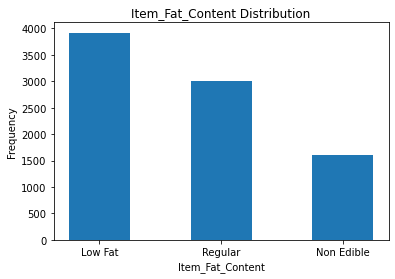

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Item_Fat_Content'].unique(), train_data['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',train_data['Item_Fat_Content'].value_counts())

Text(0, 0.5, 'Frequency')

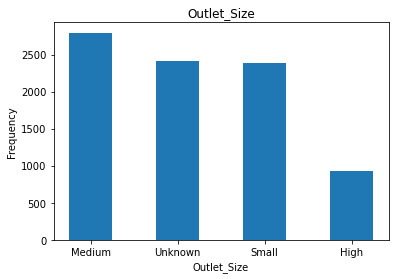

In [15]:
train_data['Outlet_Size'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Outlet_Size'].value_counts().index, train_data['Outlet_Size'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Outlet_Size')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

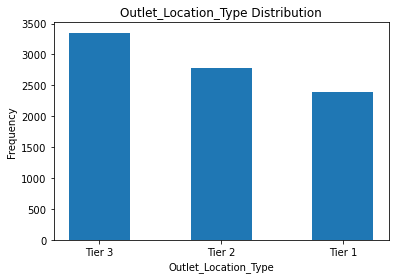

In [16]:
train_data['Outlet_Location_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Outlet_Location_Type'].value_counts().index, train_data['Outlet_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Outlet_Location_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

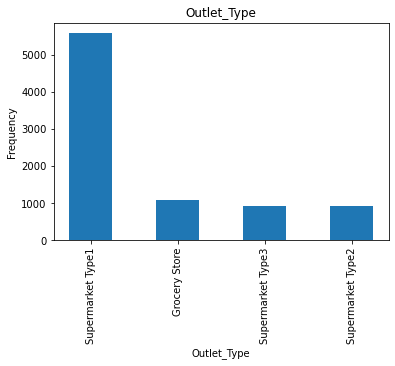

In [17]:
train_data['Outlet_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train_data['Outlet_Type'].value_counts().index, train_data['Outlet_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_data)
plt.title('Outlet_Type')
plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

In [18]:
train_data['Item_Visibility'].value_counts().head(3)

0.000000    526
0.076975      3
0.162462      2
Name: Item_Visibility, dtype: int64

In [19]:
#The column 'Item_Visibility' has lots of 0 values. Let's fill this values with the mean value
train_data['Item_Visibility'].mask(train_data['Item_Visibility']== 0,train_data['Item_Visibility'].mean(),inplace=True)
test_data['Item_Visibility'].mask(test_data['Item_Visibility']== 0,test_data['Item_Visibility'].mean(),inplace=True)

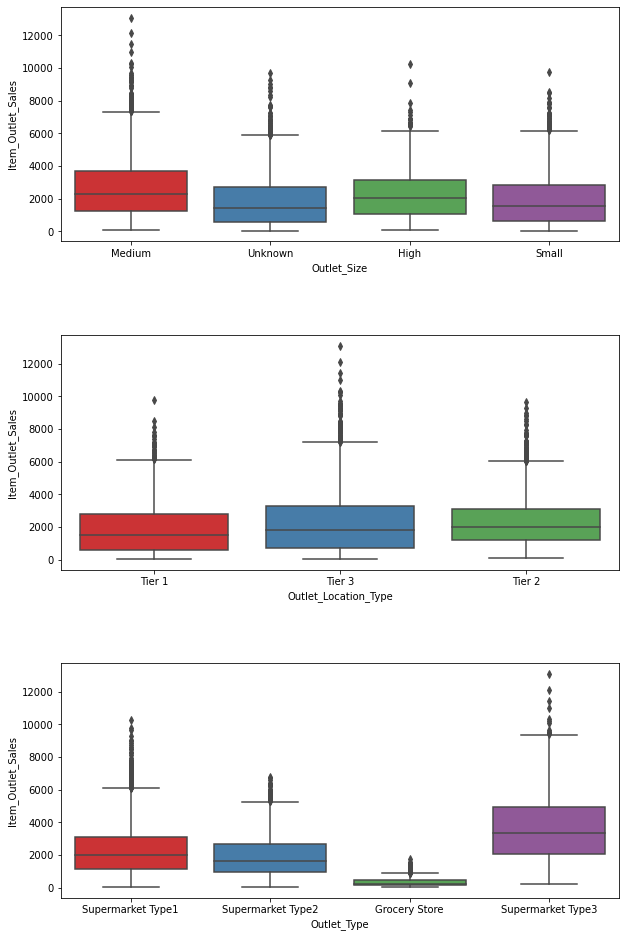

In [21]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

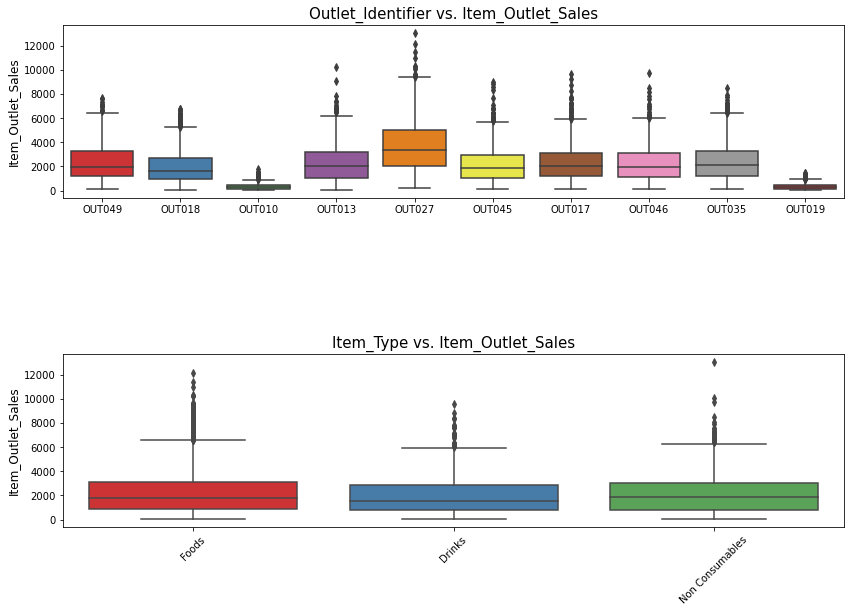

In [22]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [24]:
#Data Cleaning and Imputing Missing Values

#We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item. This can be done as:

item_avg_weight = train_data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = train_data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

train_data.loc[missing_values,'Item_Weight']  = train_data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(train_data['Item_Weight'].isnull()))

Missing values: 0
Missing values after immputation 0
